# Subsetting spatial feature objects

The following makes use of the *sf* package. You may need to install it from
[CRAN](https://cran.r-project.org/package=sf) using the code
`install.packages("sf")` if you want to run this on your computer. (The
package is already installed on the notebook container, however.)

In [1]:
library(units)
library(sf)

udunits database from /usr/share/xml/udunits/udunits2.xml
Linking to GEOS 3.11.1, GDAL 3.6.2, PROJ 9.1.1; sf_use_s2() is TRUE


The files "south-america-1990.RData" and "ged191.RData" were created in previous examples.

In [2]:
load("south-america-1990.RData")
load("ged191.RData")

In [3]:
# This fails due to different coordinate reference systems
Colombia.conflicts <- ged191[Colombia,]

old-style crs object detected; please recreate object with a recent sf::st_crs()


Error in st_geos_binop("intersects", x, y, sparse = sparse, prepared = prepared, :
st_crs(x) == st_crs(y) is not TRUE


In [4]:
st_crs(Colombia)

Coordinate Reference System:
  User input: +proj=longlat +ellps=WGS84 
  wkt:
GEOGCRS["unknown",
    DATUM["Unknown based on WGS84 ellipsoid",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1],
            ID["EPSG",7030]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433],
        ID["EPSG",8901]],
    CS[ellipsoidal,2],
        AXIS["longitude",east,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]],
        AXIS["latitude",north,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]]

In [5]:
st_crs(ged191)

old-style crs object detected; please recreate object with a recent sf::st_crs()


Coordinate Reference System:
  User input: EPSG:4326 
  wkt:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["Horizon

In [6]:
# Here we make sure that the coordinate reference systems match
ged191_ellips <- st_transform(ged191,st_crs(Colombia))
Colombia.conflicts <- ged191_ellips[Colombia,]

old-style crs object detected; please recreate object with a recent sf::st_crs()


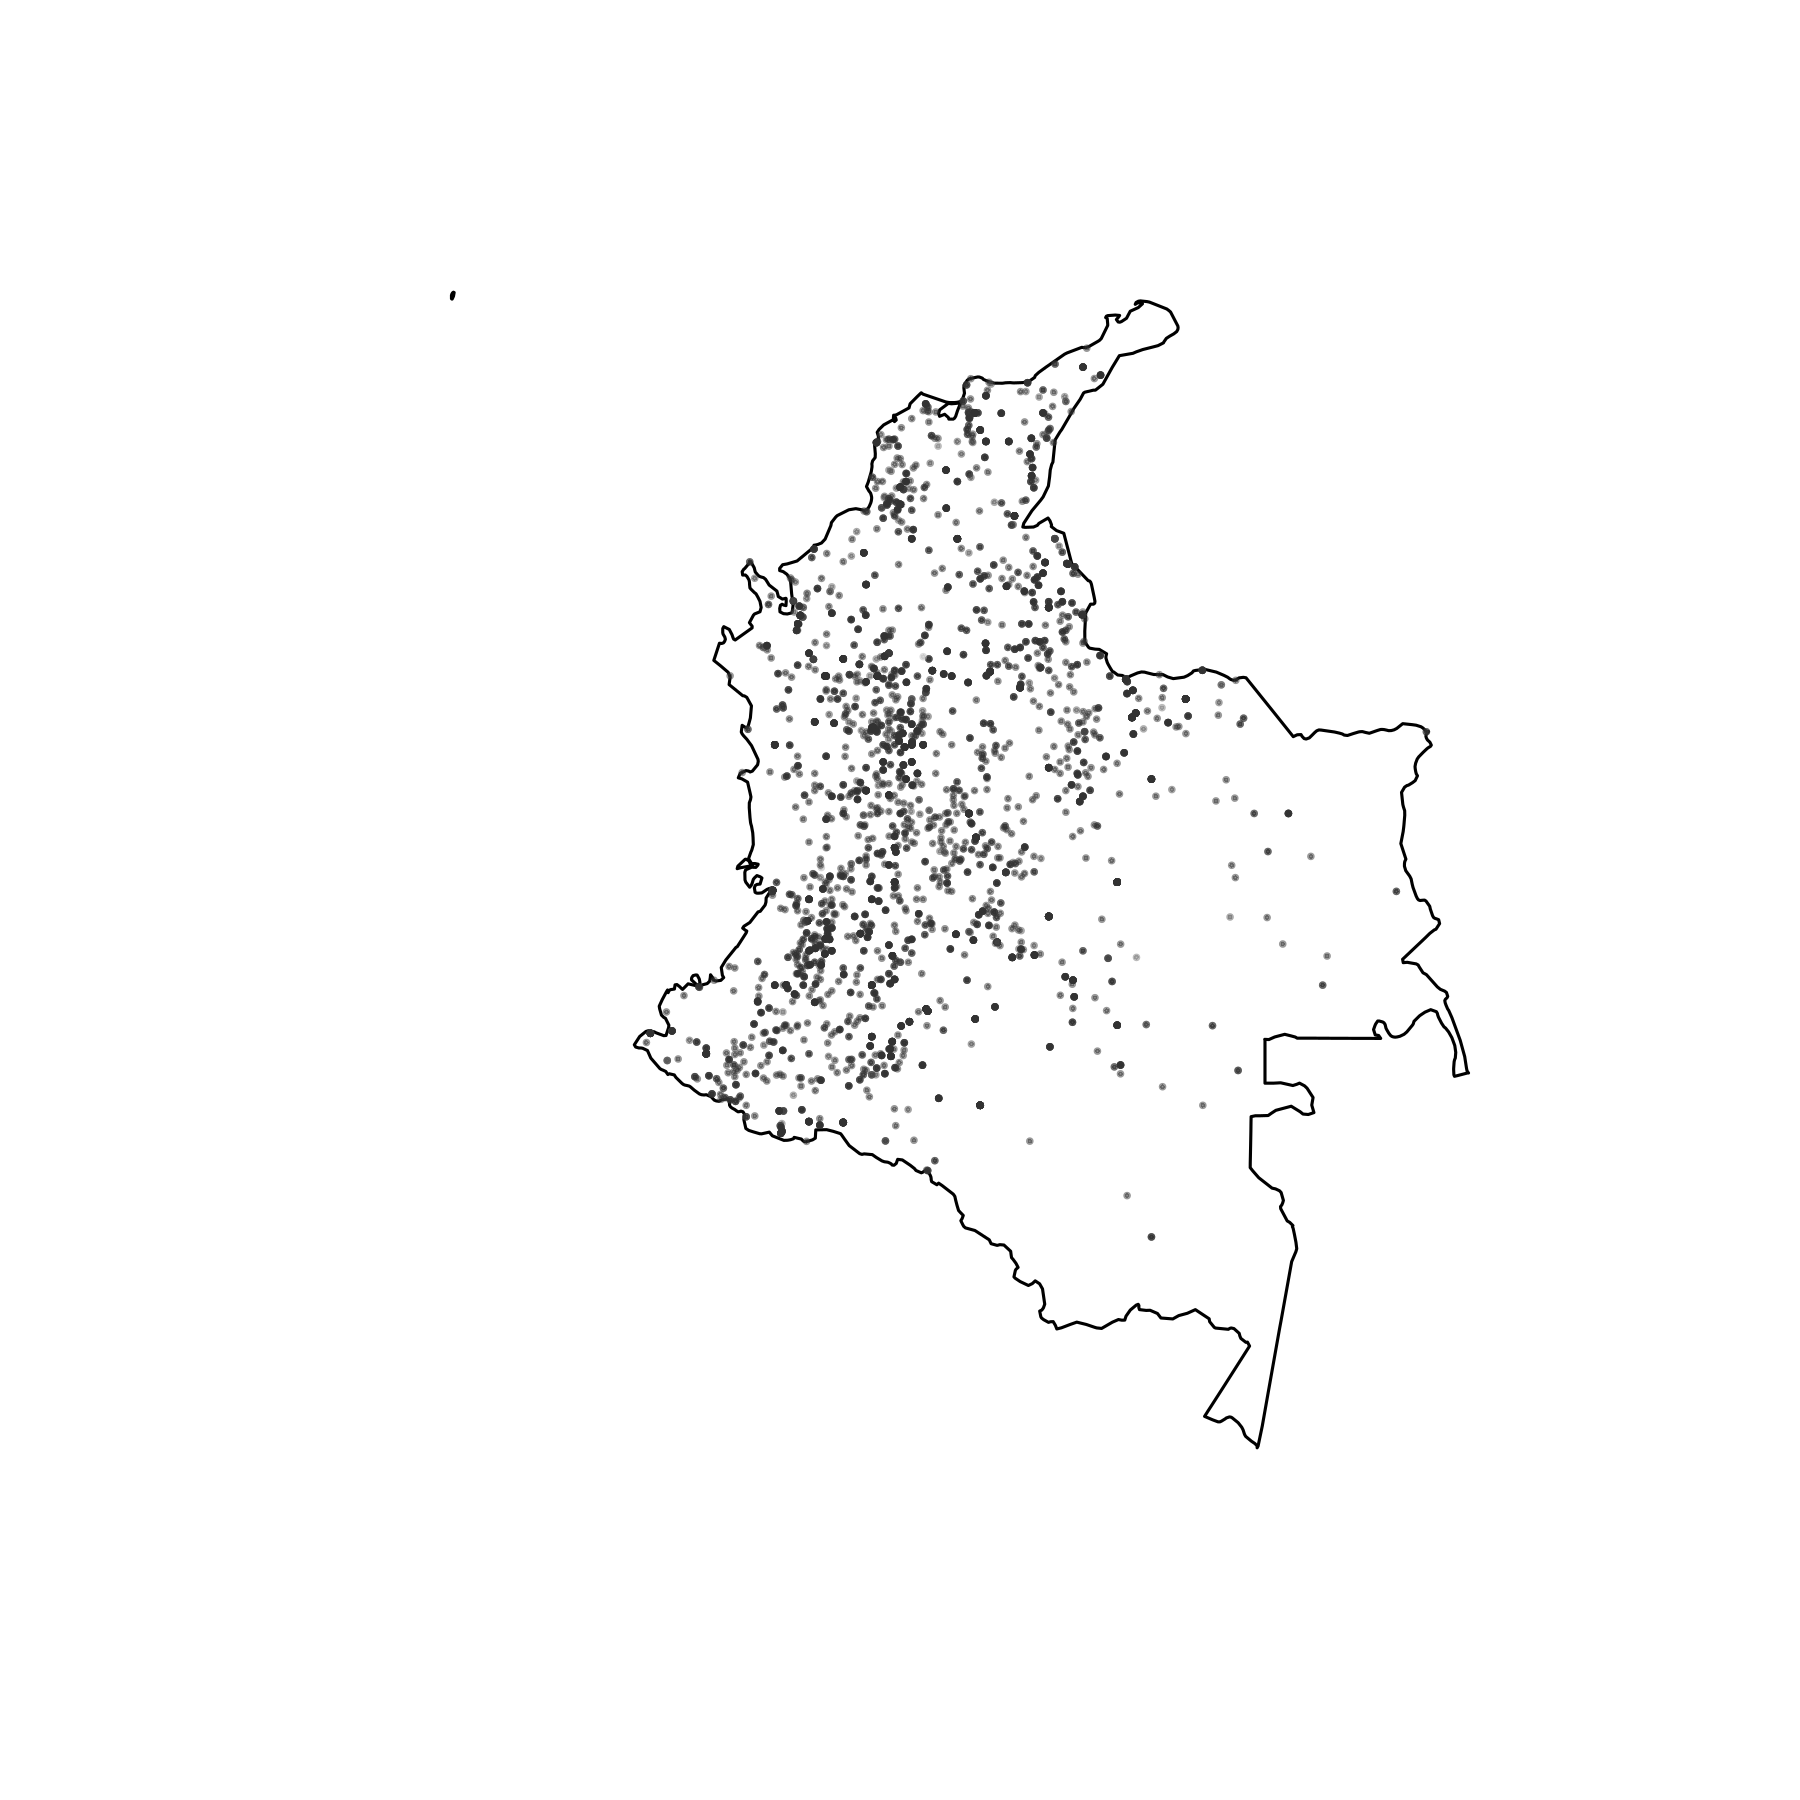

In [7]:
mypal <- function(n)gray.colors(n,start=.2,end=.9,alpha=.5)
plot(st_geometry(Colombia))
plot(Colombia.conflicts["deaths_civilians"],
     add=TRUE,pch=19,cex=.2,
     pal=mypal,
     nbreaks=30
     )

In [10]:
st_circ <- function(x,dist.km){
    #dist.degr <- 360*dist.km/40007.863 # Use for sf version <= 0.9.7
    dist.degr <- set_units(dist.km,km)
    st_buffer(st_geometry(x),dist=dist.degr)
}

In [11]:
Bogota.200km <- st_circ(Bogota,dist.km=200)

In [12]:
Bogota.conflicts <- ged191_ellips[Bogota.200km,]

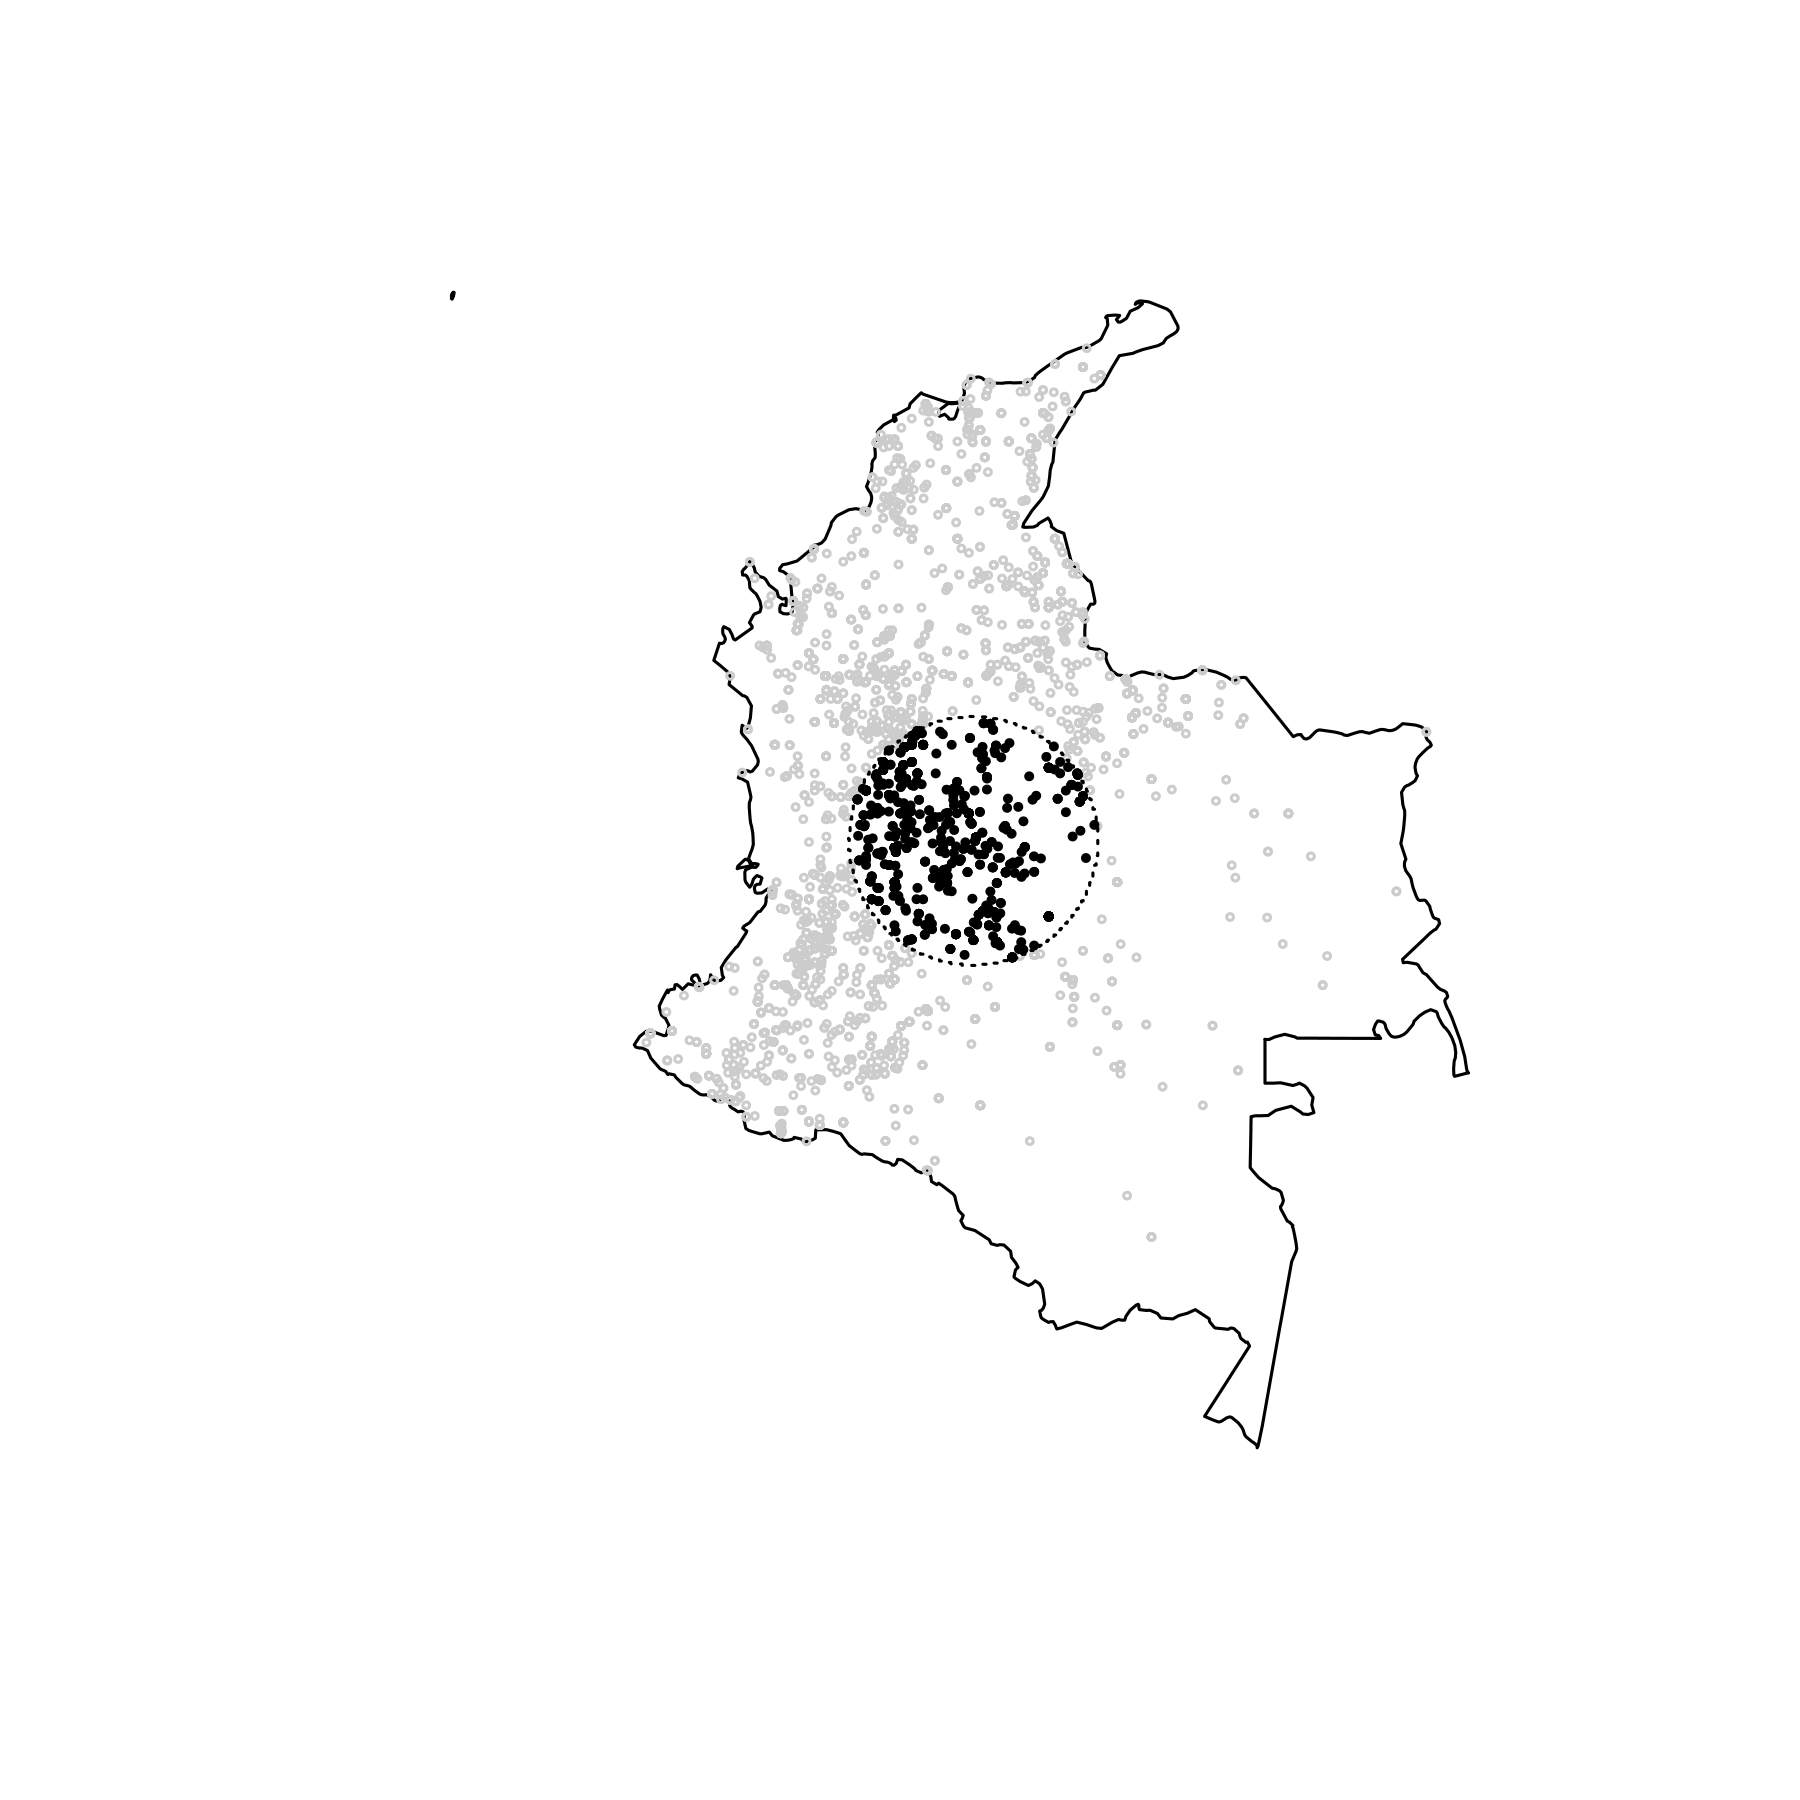

In [13]:
plot(st_geometry(Colombia))
plot(st_geometry(Colombia.conflicts),
     add=TRUE,pch=1,cex=.3,col="gray80")
plot(st_geometry(Bogota.conflicts),
     add=TRUE,pch=19,cex=.3)
plot(Bogota.200km,lty=3,add=TRUE)